<pre>Chi-square work on only categorical colummns</pre>

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
sns_data = sns.load_dataset("titanic")
df = sns_data[['pclass','sex','sibsp','parch','embarked','survived']]
df.head()

,pclass,sex,sibsp,parch,embarked,survived
0,3,male,1,0,S,0
1,1,female,1,0,C,1
2,3,female,0,0,S,1
3,1,female,1,0,S,1
4,3,male,0,0,S,0


In [3]:
# Orignal (observation) Data
ct = pd.crosstab(df["survived"],df["sex"],margins=True)
ct.head()

sex,female,male,All
survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [4]:
# Exprected data 
# for Ci = All(i) * All(j) / total
# for 81 = 549*314/891 = 193

In [5]:
from scipy.stats import chi2_contingency
chi2_contingency(ct)

Chi2ContingencyResult(statistic=np.float64(263.05057407065567), pvalue=np.float64(1.0036732821369115e-55), dof=4, expected_freq=array([[193.47474747, 355.52525253, 549.        ],
       [120.52525253, 221.47474747, 342.        ],
       [314.        , 577.        , 891.        ]]))

In [7]:
score = []

for feature in df.columns[:-1]:
    
    # create contingency table
    ct = pd.crosstab(df['survived'], df[feature])
    
    # chi_test
    p_value = chi2_contingency(ct)[1]
    score.append(p_value)

<Axes: >

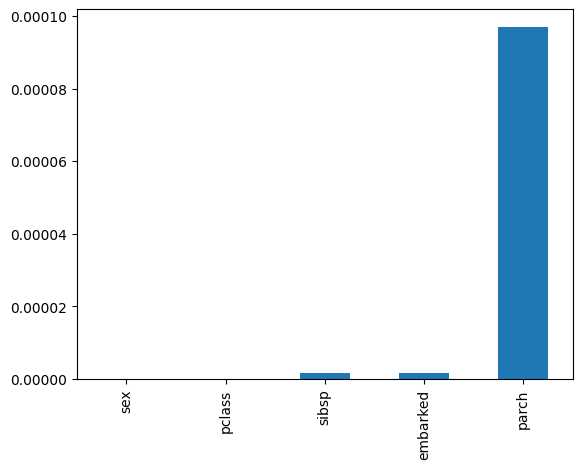

In [12]:
pd.Series(score, index=df.columns[:-1]).sort_values(ascending=True).plot(kind='bar')

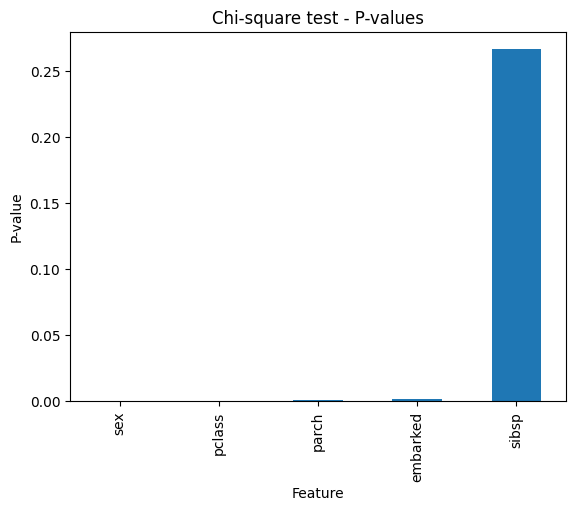

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

# assuming titanic is your DataFrame and 'Survived' is the target column

# Encode categorical variables
le = LabelEncoder()
titanic_encoded = df.apply(le.fit_transform)

X = titanic_encoded.drop('survived', axis=1)
y = titanic_encoded['survived']

# Calculate chi-squared stats
chi_scores = chi2(X, y)

# chi_scores[1] are the p-values of each feature.
p_values = pd.Series(chi_scores[1], index = X.columns)
p_values.sort_values(inplace = True)

# Plotting the p-values
p_values.plot.bar()

plt.title('Chi-square test - P-values')
plt.xlabel('Feature')
plt.ylabel('P-value')

plt.show()